In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df_2014 = pd.read_csv("2014_provider_summary.csv")
df_2014_by_state = pd.read_csv("2014_by_State_Medicare_Charge_Inpatient.csv")
df_2015 = pd.read_csv("2015_provider_summary.csv")
df_2015_by_state = pd.read_csv("2015_by_State_Medicare_Charge_Inpatient.csv")
df_2016 = pd.read_csv("2016_provider_summary.csv")
df_2016_national = pd.read_csv("2016_National_Medicare_Charge_Inpatient.csv")
df_2016_by_state = pd.read_csv("2016_by_State_Medicare_Charge_Inpatient.csv")


C:\Users\jp_ba\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Format number columns for consistency
df_2016_by_state[' Total Discharges '] = df_2016_by_state[' Total Discharges '].str.replace('$','').str.replace(',','')
df_2016_by_state[' Total Discharges '] = df_2016_by_state[' Total Discharges '].astype(np.float64)

df_2016_by_state['Average Covered Charges'] = df_2016_by_state['Average Covered Charges'].str.replace('$','').str.replace(',','')
df_2016_by_state['Average Covered Charges'] = df_2016_by_state['Average Covered Charges'].astype(np.float64)

df_2016_by_state['Average Total Payments'] = df_2016_by_state['Average Total Payments'].str.replace('$','').str.replace(',','')
df_2016_by_state['Average Total Payments'] = df_2016_by_state['Average Total Payments'].astype(np.float64)

df_2016_by_state['Average Medicare Payments'] = df_2016_by_state['Average Medicare Payments'].str.replace('$','').str.replace(',','')
df_2016_by_state['Average Medicare Payments'] = df_2016_by_state['Average Medicare Payments'].astype(np.float64)


In [4]:
df_2016['Average Covered Charges'] = df_2016['Average Covered Charges'].str.replace('$','').str.replace(',','')
df_2016['Average Covered Charges'] = df_2016['Average Covered Charges'].astype(np.float)

In [5]:
#Create new Columns in each dataframe with its year
df_2014['Year'] = 2014
df_2015['Year'] = 2015
df_2016['Year'] = 2016

In [6]:
#Concatenate three years of dataframes into one
df_all = pd.concat([df_2014, df_2015, df_2016], axis=0)

df_all.head(3)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Year
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1172866.385,251876,244458,2014
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,20,437531.300,240423,133510,2014
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,SUTTER GENERAL HOSPITAL,2801 L STREET,SACRAMENTO,CA,95816,CA - Sacramento,25,815674.120,233197,221682,2014


In [7]:
#Summary dataframe with only columns to be utilized
df_all = df_all[['Year', 'Provider State', 'Average Covered Charges']]

df_all.head(3)

,Year,Provider State,Average Covered Charges
0,2014,AL,1172866.385
1,2014,AZ,437531.300
2,2014,CA,815674.120


In [8]:
df_all_by_state = df_all.groupby(['Year', 'Provider State']).sum()

df_all_by_state.head(3)

Average Covered Charges
Year Provider State                         
2014 AK                         1.992402e+07
     AL                         2.020924e+08
     AR                         9.364658e+07

In [9]:
#Set states as index
df_all_by_state.reset_index(['Year', 'Provider State'], inplace=True)
df_all_by_state.head(3)

# df_all_by_state['Year'].astype('int')

,Year,Provider State,Average Covered Charges
0,2014,AK,1.992402e+07
1,2014,AL,2.020924e+08
2,2014,AR,9.364658e+07


In [10]:
df_highs_by_year = df_all_by_state.sort_values(by='Average Covered Charges', ascending=False)

df_highs_by_year = df_highs_by_year.head(15)
df_highs_by_year

,Year,Provider State,Average Covered Charges
106,2016,CA,1.543589e+09
55,2015,CA,1.476417e+09
4,2014,CA,1.453879e+09
111,2016,FL,1.085126e+09
60,2015,FL,1.043925e+09
9,2014,FL,9.785903e+08
145,2016,TX,9.463731e+08
94,2015,TX,9.032801e+08
43,2014,TX,8.588009e+08
136,2016,NY,6.628270e+08


In [11]:
df_highs_by_yearCA = df_highs_by_year.head(3)
df_highs_by_yearFL = df_highs_by_year.iloc[3:6]
df_highs_by_yearTX = df_highs_by_year.iloc[6:9]
df_highs_by_yearNY = df_highs_by_year.iloc[9:11]
df_highs_by_yearPA = df_highs_by_year.iloc[11:13]

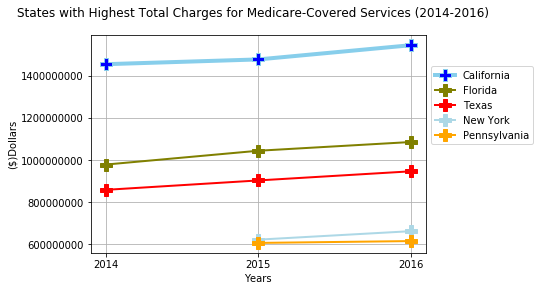

In [16]:
# multiple line plot
plt.plot('Year', 'Average Covered Charges', data=df_highs_by_yearCA, marker='P', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label='California')
plt.plot('Year', 'Average Covered Charges', data=df_highs_by_yearFL, marker='P', markersize=12, color='olive', linewidth=2, label='Florida')
plt.plot('Year', 'Average Covered Charges', data=df_highs_by_yearTX, color='red', linewidth=2, marker='P', markersize=12, label="Texas")
plt.plot('Year', 'Average Covered Charges', data=df_highs_by_yearNY, color='lightblue', linewidth=2, marker='P', markersize=12, label="New York")
plt.plot('Year', 'Average Covered Charges', data=df_highs_by_yearPA, color='orange', linewidth=2, marker='P', markersize=12, label="Pennsylvania")

#Legend
plt.legend(bbox_to_anchor=(1, .88), prop={'size': 10})

#Change y label to plain numbers
plt.ticklabel_format(axis='y', style='plain')

plt.suptitle('States with Highest Total Charges for Medicare-Covered Services (2014-2016)')

#x and y axis labels
plt.xlabel ('Years')
plt.xticks(df_highs_by_yearCA['Year'])
plt.ylabel('($)Dollars')

#Add grid
plt.grid()

#Save to file
plt.savefig('StatesHighestTotalCharges.png')

In [ ]:
set_2014 = df_all_by_state.loc[df_all_by_state['Year'] == 2014]

In [ ]:
set_2015 = df_all_by_state.loc[df_all_by_state['Year'] == 2015]

In [ ]:
set_2016 = df_all_by_state.loc[df_all_by_state['Year'] == 2016]

In [ ]:
set_2016 = df_all_by_state.loc[df_all_by_state['Year'] == 2016]

avg_charges_2016 = set_2016.nlargest(3, 'Average Covered Charges')

avg_charges_2016

In [ ]:
provider_count_by_state_2016 = df_2016.groupby('Provider State')['Provider Name'].nunique().reset_index(name='Provider Count')

provider_count_by_state_2016.head(3)

In [ ]:
provider_count_by_state_2015 = df_2015.groupby('Provider State')['Provider Name'].nunique().reset_index(name='Provider Count')

provider_count_by_state_2015.head(3)

In [ ]:
provider_count_by_state_2014 = df_2014.groupby('Provider State')['Provider Name'].nunique().reset_index(name='Provider Count')

provider_count_by_state_2014.head(3)

In [ ]:
df_2016_final = pd.merge(set_2016, provider_count_by_state_2016, on='Provider State')

In [ ]:
df_2016_final['Avg Charge per Provider'] = df_2016_final['Average Covered Charges']/df_2016_final['Provider Count']

In [ ]:
df_2016_final.head()

In [ ]:
highs_per_provider2016 = df_2016_final.sort_values(by='Avg Charge per Provider', ascending=False).head(5)
highs_per_provider2016

In [ ]:
lows_per_provider2016 = df_2016_final.sort_values(by='Avg Charge per Provider', ascending=True).head(5)
lows_per_provider2016

In [ ]:
df_2015_final = pd.merge(set_2015, provider_count_by_state_2015, on='Provider State')

In [ ]:
df_2015_final['Avg Charge per Provider'] = df_2015_final['Average Covered Charges']/df_2015_final['Provider Count']

df_2015_final.head(3)

In [ ]:
highs_per_provider2015 = df_2015_final.sort_values(by='Avg Charge per Provider', ascending=False).head(5)
highs_per_provider2015

In [ ]:
lows_per_provider2015 = df_2015_final.sort_values(by='Avg Charge per Provider', ascending=True).head(5)
lows_per_provider2015

In [ ]:
df_2014_final = pd.merge(set_2014, provider_count_by_state_2014, on='Provider State')

In [ ]:
df_2014_final['Avg Charge per Provider'] = df_2014_final['Average Covered Charges']/df_2014_final['Provider Count']

df_2014_final.head(3)

In [ ]:
highs_per_provider2014 = df_2014_final.sort_values(by='Avg Charge per Provider', ascending=False).head(5)
highs_per_provider2014

In [ ]:
lows_per_provider2014 = df_2014_final.sort_values(by='Avg Charge per Provider', ascending=True).head(5)
lows_per_provider2014

In [ ]:
# Format currency style
highs_per_provider2016.style.format({'Avg Charge per Provider':"${:,.2f}"})

#Format graph
plt.plot(highs_per_provider2016['Provider State'],highs_per_provider2016['Avg Charge per Provider'],
                marker='o', markersize=12, color='darkred', label='2016')
plt.plot(highs_per_provider2015['Provider State'],highs_per_provider2015['Avg Charge per Provider'],
                marker='o', markersize=12, color='olive', label='2015')
plt.plot(highs_per_provider2014['Provider State'],highs_per_provider2014['Avg Charge per Provider'],
                marker='o', markersize=12, color='navy', label='2014')

#Legend
plt.legend(loc='best')

#Title and axis labels
plt.suptitle('Highest Average Charges per Provider')

#x and y axes labels
plt.xlabel('States')
plt.ylabel('($)Dollars in Millions')

#Add grid
plt.grid()

#Save to file
plt.savefig('LineHighestAverageChargesperProvider.png')


In [ ]:
# Format currency style
highs_per_provider2016.style.format({'Avg Charge per Provider':"${:,.2f}"})

#Format same graph as above but with bars to match lowest $ per provider
plt.bar(highs_per_provider2016['Provider State'],highs_per_provider2016['Avg Charge per Provider'],
                width= .8, color='lightskyblue', label='2016')
plt.bar(highs_per_provider2015['Provider State'],highs_per_provider2015['Avg Charge per Provider'],
                width= .5, color='orange', label='2015')
plt.bar(highs_per_provider2014['Provider State'],highs_per_provider2014['Avg Charge per Provider'],
                width= .3, color='navy', label='2014')

#Legend
plt.legend(loc='best')

#Title and axis labels
plt.suptitle('Highest Average Charges per Provider')

#x and y axes labels
plt.xlabel('States')
plt.ylabel('($)Dollars in Millions')

#Save to file
plt.savefig('HighestAverageChargesperProvider.png')


In [ ]:
# Format currency style
lows_per_provider2016.style.format({'Avg Charge per Provider':"${:,.2f}"})

plt.bar(lows_per_provider2016['Provider State'],lows_per_provider2016['Avg Charge per Provider'], width=.8, color='lightskyblue', label='2016')
plt.bar(lows_per_provider2015['Provider State'],lows_per_provider2015['Avg Charge per Provider'], width=.5, color='orange', label='2015')
plt.bar(lows_per_provider2014['Provider State'],lows_per_provider2014['Avg Charge per Provider'], width=.3, color='navy', label='2014')


#Legend
plt.legend(loc='best')

#Title and axis labels
plt.suptitle('Lowest Average Charges per Provider')

#x and y axes labels
plt.xlabel('States')
plt.ylabel('($)Dollars')

#Save to file
plt.savefig('LowestAverageChargesperProvider.png')
